In [6]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [7]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Fight/CDI_Based/Entropy/CSV/Harris.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

<ipython-input-7-1e78ac36c29d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class']==1] = -1
<ipython-input-7-1e78ac36c29d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class'] == 0] = 1


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,0.202022,0.304452,0.230528,0.182746,0.059950,0.029832,0.045690,0.028934,0.018980,0.020198,...,0.445003,0.348471,0.386618,0.328983,0.401429,0.288535,0.140867,0.282142,0.206918,1
1,0.247334,0.537483,0.318685,0.393471,0.237784,0.215865,0.207918,0.134780,0.226185,0.218292,...,0.230153,0.213028,0.299468,0.273653,0.728459,0.778864,0.346999,0.361662,0.298757,1
2,0.353779,0.408357,0.607377,0.446226,0.539834,0.166197,0.160716,0.123563,0.262979,0.465916,...,0.335860,0.203315,0.223471,0.157733,0.524541,0.277304,0.115814,0.071290,0.100076,1
3,0.612616,0.226134,0.169229,0.160205,0.199230,0.522088,0.201602,0.157590,0.116533,0.078628,...,0.178199,0.564558,0.166065,0.169090,0.096965,0.105894,0.381938,0.249440,0.181556,1
4,0.320776,0.318750,0.223112,0.153014,0.190272,0.157910,0.181436,0.305717,0.099961,0.089792,...,0.264970,0.281821,0.190057,0.151929,0.070791,0.094613,0.178786,0.147989,0.097888,1


In [8]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=2)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)
std=StandardScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)

In [9]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.5
              precision    recall  f1-score   support

          -1       0.69      0.58      0.63        88
           1       0.20      0.28      0.23        32

    accuracy                           0.50       120
   macro avg       0.44      0.43      0.43       120
weighted avg       0.56      0.50      0.52       120



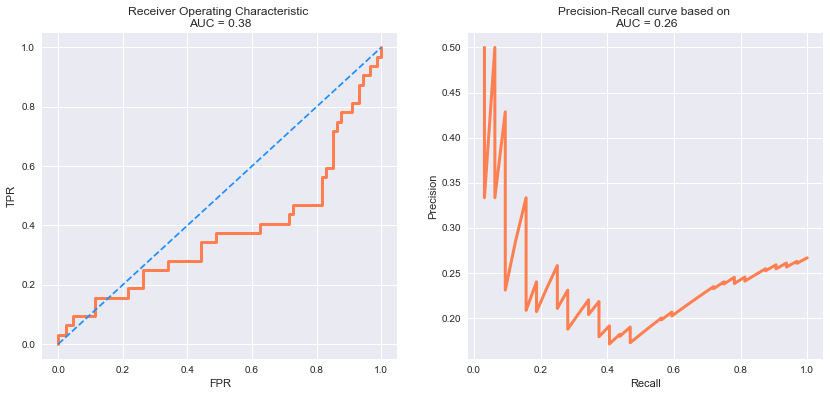

In [10]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()